**i copied most of the code below from textbook, and my code for project3.2 starts from the title 'binary classifier'**

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "/Users/wangj3475/Program/Jupyter Notebook/ML-Project3"
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
28*28

784

Saving figure some_digit_plot


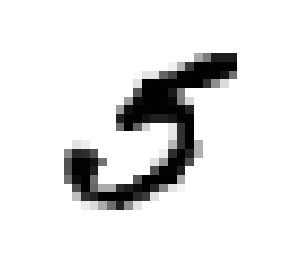

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [7]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [8]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


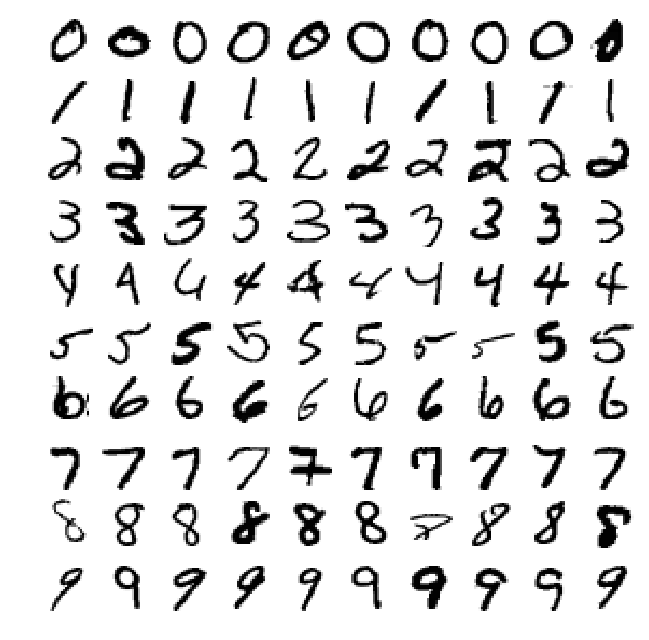

In [9]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [10]:
y[68000]

7.0

In [17]:
 X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
import numpy as np

shuffle_index = np.random.permutation(45000 - 30000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [19]:
y_knn_pred = knn_clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.97140000000000004

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_neighbors': [5, 10, 20], 'weights':['uniform','distance'], 'n_jobs': [-1]}
]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv = 3, scoring = 'accuracy', return_train_score = True)

In [42]:
#use the small dataset to make my life easier...
grid_search.fit(X_test,y_test)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [5, 10, 20], 'weights': ['uniform', 'distance'], 'n_jobs': [-1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [43]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9359 {'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}
0.9398 {'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}
0.9287 {'n_jobs': -1, 'n_neighbors': 10, 'weights': 'uniform'}
0.9326 {'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}
0.9164 {'n_jobs': -1, 'n_neighbors': 20, 'weights': 'uniform'}
0.9207 {'n_jobs': -1, 'n_neighbors': 20, 'weights': 'distance'}


In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_neighbors': [2, 7, 12], 'weights':['uniform','distance'], 'n_jobs': [-1]}
]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv = 3, scoring = 'accuracy', return_train_score = True)


In [45]:
grid_search.fit(X_test,y_test)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [2, 7, 12], 'weights': ['uniform', 'distance'], 'n_jobs': [-1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [46]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9233 {'n_jobs': -1, 'n_neighbors': 2, 'weights': 'uniform'}
0.935 {'n_jobs': -1, 'n_neighbors': 2, 'weights': 'distance'}
0.933 {'n_jobs': -1, 'n_neighbors': 7, 'weights': 'uniform'}
0.936 {'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}
0.9257 {'n_jobs': -1, 'n_neighbors': 12, 'weights': 'uniform'}
0.9299 {'n_jobs': -1, 'n_neighbors': 12, 'weights': 'distance'}


the best result comes with k =5, weights = distnace. though the accuracy is just around 0.9398.
but the result comes from cross-vaildation of test set
the result may be different if use train set to train and use test set to test
let's see

In [47]:
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance')

In [48]:
y_knn_pred = knn_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.96909999999999996

almost 97%! anyway, i found when k =4, the predict accuracy could be over 97%.
it seems like the grid search result cannot help me find the best hyperparamter.